In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
file_path = '/content/50_Startups.csv'
data = pd.read_csv(file_path)

In [5]:
X = data[['R&D Spend']]
y = data['Profit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_[0])

R² Score: 0.9265108109341951
Intercept: 49336.6680379911
Coefficient: 0.8536091075148804


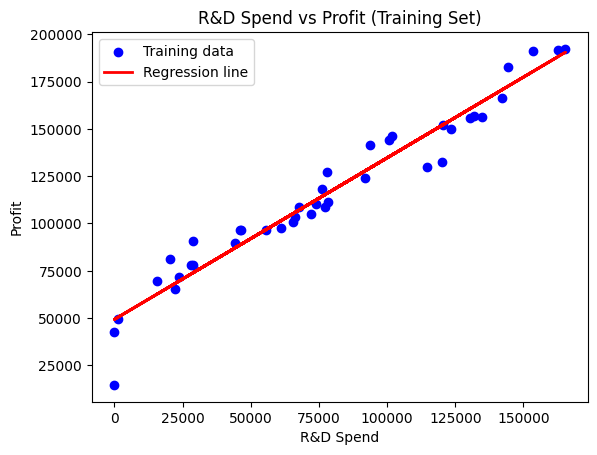

In [11]:
plt.scatter(X_train, y_train, color='blue', label="Training data")
plt.plot(X_train, lr.predict(X_train), color='red', linewidth=2, label="Regression line")
plt.title("R&D Spend vs Profit (Training Set)")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.legend()
plt.show()

In [12]:
import pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [13]:
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [17]:
sample_prediction = loaded_model.predict(X[:5])


In [19]:
sample_data = pd.DataFrame({
    'R&D Spend': X[:5].values.flatten(),
    'Predicted Profit': sample_prediction
})

In [20]:
print(sample_data)

   R&D Spend  Predicted Profit
0  165349.20     190480.251078
1  162597.70     188131.545619
2  153441.51     180315.738445
3  144372.41     172574.272088
4  142107.34     170640.787707


In [23]:
predictions_comparison = pd.DataFrame({
    'Actual Profit': y_test.values,
    'Predicted Profit': y_pred,
    'Difference': y_test.values - y_pred
})

In [24]:
print(predictions_comparison.head())

   Actual Profit  Predicted Profit    Difference
0      134307.35     127862.209964   6445.140036
1       81005.76      82250.563346  -1244.803346
2       99937.59     102255.720782  -2318.130782
3       64926.08      50190.473476  14735.606524
4      125370.37     130136.881905  -4766.511905
